## Stock selection according to Hossein PTS Cointegration 
- we calculate the spread between the normalized prices of all possible combinations of stock pairs during the formation period. The formation period is chosen to be 12 months. 
- The normalized price is defined as the cumulative return index, adjusted for dividends and other corporate actions, and scaled to $1 at the beginning of the formation period. 
- We then select 20 of those combinations that have the least sum of squared spreads, or sum of squared differences (SSD), to form the nominated pairs to trade in the following trading period, that is chosen to be 6 months. The standard deviation of the spread during the formation period is also recorded and used as the trading criterion. A specific stock can participate in forming more than one pair as long as the other stock of the pair varies.
- then we test each of the pairs with the least SSD for cointegration,
by using their cumulative return series in the formation period. Pairs that are not cointegrated are eliminated in the selection process. Pairs that are cointegrated will have their cointegration coefficient estimated. We continue until 20 cointegrated pairs with minimum SSDs are selected to be traded in the following trading period
- After selecting nominated cointegrated pairs using the two-step Engle-Granger method (Engle and Granger, 1987), we extract their stationary spread.
- Thus, the profit of buying one share of stock 2 and selling beta share of stock 1 for the period delta t is given by the change in the spread for that period.

## Load the stock data from sp500
- also transform to cumulative return series for each stock

In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt
#stocks = pd.read_csv("~/OneDrive/Desktop/Jakub/masterThesis/stocks.csv")

stocks = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/stocks.csv",index_col = 0)

def normalize(stocks: pd.DataFrame) -> pd.DataFrame:
    """
    Convert stock price series into cumulative return with 1 as a starting value.
    """
    # Only normalize using the first valid price (starting trading date differs for some stocks)
    first_valid = stocks.apply(lambda col: col[col.first_valid_index()])
    df_result = stocks/first_valid
    return df_result

stocks = normalize(stocks)
stocks

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-11,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-03-12,1.006120,1.018079,1.024373,NaN,1.020519,1.011356,1.015427,1.018287,1.003840,1.025055,...,1.008800,1.010482,0.997552,1.017725,1.002380,1.017062,1.017516,1.008346,0.997955,1.018040
2015-03-13,1.000490,1.011044,1.024373,NaN,1.012527,1.012837,1.011628,1.021181,1.004189,1.017583,...,1.011314,0.990117,1.003475,1.006096,0.998215,1.000867,1.013203,1.000172,0.996705,1.009564
2015-03-16,1.023501,1.022169,1.044154,NaN,1.033045,1.021889,1.023601,1.030522,1.026357,1.021758,...,1.028913,1.008685,0.992261,1.020409,1.008808,1.013013,1.022091,1.015401,1.010227,1.021083
2015-03-17,1.017871,1.039267,1.054928,NaN,1.017062,1.021889,1.022795,1.048020,1.025659,1.016483,...,1.028703,1.002096,0.983811,1.017725,1.000714,1.002603,1.017778,0.991827,0.977045,1.024777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05,3.362833,8.635299,5.661750,0.985281,3.598610,4.743270,4.729595,5.936587,4.922357,1.344970,...,3.095707,1.366030,0.820901,2.780878,1.942955,4.253032,3.498992,1.003486,3.454545,3.907236
2025-03-06,3.363896,8.620281,5.640607,0.931311,3.529884,4.744828,4.642407,5.851598,4.778635,1.411338,...,3.058040,1.334673,0.798448,2.737585,1.983126,4.229745,3.496577,1.008946,3.347273,3.913085
2025-03-07,3.367883,8.757279,5.735353,0.928685,3.583715,4.725097,4.647025,5.912380,4.844919,1.451863,...,3.062297,1.363137,0.803246,2.751342,2.008924,4.284190,3.568370,1.034525,3.326023,3.986083


## Formation period (selection 12months)

In [21]:
import pandas as pd
import numpy as np
from itertools import combinations
from tqdm import tqdm

def calculate_and_sort_ssd(stocks: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate sum of squared differences (SSD) for all unique pairs of stocks and sort them.

    Parameters:
    stocks : pd.DataFrame
        Normalized stock dataframe scaled to 1 at the start for each stock.

    Returns:
    pd.DataFrame
        Sorted dataframe containing all possible stock pairs with their SSD values.
    """

    stock_pairs = list(combinations(stocks.columns, 2))  # Unique stock pairs
    ssd_values = {}

    for ticker1, ticker2 in tqdm(stock_pairs, desc="Calculating SSDs"):
        
        # Assign stock price series 
        stock1, stock2 = stocks[ticker1], stocks[ticker2]
        
        # If the stock is not trading yet, skip this pair. 
        if stock1.isna().any() or stock2.isna().any():
            continue
        
        # Compute SSD 
        spread = stock1 - stock2
        ssd = np.sum(np.square(spread)) 

        # Store directly in a dictionary
        ssd_values[f"{ticker1}_{ticker2}"] = ssd  

    # Convert dictionary to DataFrame (much faster than appending)
    df_result = pd.DataFrame.from_dict(ssd_values, orient="index", columns=["SSD"])

    return df_result.sort_values(by="SSD")


stocks_formation = stocks.iloc[:100]
# Example usage (selecting first 100 rows for all stocks)
ssd_df = calculate_and_sort_ssd(stocks_formation)

ssd_df

Calculating SSDs:   0%|          | 0/126253 [00:00<?, ?it/s]

Calculating SSDs: 100%|██████████| 126253/126253 [01:04<00:00, 1953.40it/s]


,SSD
LNT_XEL,0.006254
LNT_WEC,0.006460
KO_PEP,0.006528
NWS_NWSA,0.007073
KIM_O,0.008628
...,...
AMAT_BLDR,140.868707
BLDR_GNRC,143.489096
BLDR_SMCI,148.931876
AMD_BLDR,150.969918


In [ ]:
#ssd_df.to_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/calculate_and_sort_test_result.csv")

In [39]:

#test pairs from the 100 days test formation period
pairs = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/calculate_and_sort_test_result.csv", index_col=0)

def select_cointegrated_pairs(stocks: pd.DataFrame, pairs: pd.DataFrame) -> pd.DataFrame:
    """
    Test for cointegration using the engle-granger two step procedure. Continue until 20 pairs are found. This portfolio will 
    be traded for the next 6 months.

    Parameters: 
    stocks: normalized stocks dataframe, a 12 month subset (formation period)  with a date column as an index
    pairs: all possible pairs ordered by ssd

    Returns: 
    porftolio: a portfolio of 20 stocks to be traded in the following 6 months 
    """

    portfolio = pd.DataFrame()
    pair_count = 0
    
    for pair in pairs.index:
        stock1, stock2 = pair.split("_")
        print(100 * "-", "\nProcessing pair:", stock1, "-", stock2)

        # Step 1: OLS of stock2 on stock1 (without constant)
        data = pd.concat([stocks[stock1], stocks[stock2]], axis=1).dropna()  # Drop NaN values
        x = data[stock1]  # No sm.add_constant()
        y = data[stock2]

        try:
            model = sm.OLS(y,x).fit()
            print("fitting ols....")
        except Exception as e:
            print(f"Error during OLS fit: {e}")

        ols_pvalue = model.pvalues.iloc[0]
        print("OLS p-values:\n", model.pvalues)
        print("\n",ols_pvalue)
       
        # if there is no linear relationship, continue
        if ols_pvalue > 0.05 or math.isnan(ols_pvalue): 
            print("NO OLS FIT...")
            continue 
        
        print("OLS FIT FOUND....")
        
        # Step 2 : dickey Fuller test of the residuals (the spread)
        residuals = pd.Series(model.resid)

        # Check stationarity
        try:
            adf_pvalue = adfuller(residuals)[1]
            print("ADF p value: " ,adf_pvalue)
        except Exception as e:
            print(f"Error during ADF test: {e}")

        # if stationary, select that pair as cointegrated, extract Beta, and parameters and add to the portfolio
        if  adf_pvalue < 0.05 and not np.isnan(adf_pvalue):
            print("Pair was selected and added to the portfolio!")
            # Assign to DataFrame
            portfolio.loc[pair, 'beta'] = model.params.iloc[0]
            portfolio.loc[pair, 'mean'] = np.mean(residuals)
            portfolio.loc[pair, 'sd'] = np.std(residuals)
            pair_count += 1
        else: 
            print("non-stationary series!...")
        
        if pair_count == 20:
            print(100*"X", "\n portfolio of 20 was selected")
            break

        print("\n pair count is :", pair_count) 
        
    return portfolio    

portfolio = select_cointegrated_pairs(stocks_formation, pairs)
#portfolio.to_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/select_cointegrated_pairs_test_result.csv")
portfolio

---------------------------------------------------------------------------------------------------- 
Processing pair: LNT - XEL
fitting ols....
OLS p-values:
 LNT    6.712815e-218
dtype: float64

 6.71281492054475e-218
OLS FIT FOUND....
ADF p value:  0.3638019115927329
non-stationary series!...

 pair count is : 0
---------------------------------------------------------------------------------------------------- 
Processing pair: LNT - WEC
fitting ols....
OLS p-values:
 LNT    2.786512e-210
dtype: float64

 2.786511653115397e-210
OLS FIT FOUND....
ADF p value:  0.0694578752340998
non-stationary series!...

 pair count is : 0
---------------------------------------------------------------------------------------------------- 
Processing pair: KO - PEP
fitting ols....
OLS p-values:
 KO    3.409870e-210
dtype: float64

 3.409870245599356e-210
OLS FIT FOUND....
ADF p value:  0.004447217284209113
Pair was selected and added to the portfolio!

 pair count is : 1
---------------------------

,beta,mean,sd
KO_PEP,1.000659,0.000024,0.008051
KIM_O,0.998451,0.000198,0.009163
DTE_WEC,0.994497,0.000047,0.007597
ITW_MMM,0.998986,0.000051,0.010211
JNJ_KO,1.002120,0.000052,0.010128
MCD_PEP,0.999824,0.000063,0.010685
CHD_HD,0.996538,0.000006,0.010817
FDS_IT,0.994066,0.000017,0.009468
AEP_PCG,1.001808,0.000023,0.011283
JNJ_PEP,1.002800,0.000055,0.011132


## Trading period (6 months)
- functions that calculate the trading period results

In [40]:
def calculate_portfolio_spread(stocks: pd.DataFrame, portfolio: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates spread and normalized spread for all 20 pairs of the portfolio based on the beta coefficient and parameters 
    estimated during the formation period.

    Params: 
    stocks: 6 month trading period stock dataframe.
    portfolio: contains 20 pairs of stocks to trade along with the parameters from the formation period.

    Returns: 2 dataframes, spread and normalized spread dataFrame for the trading period
    """
     # Initialize the DataFrames with the correct structure.
    spread_df = pd.DataFrame(index=stocks.index)  # Set the index to match the stocks DataFrame
    spread_df_normalized = pd.DataFrame(index=stocks.index)  # Same as above
    
    for pair in portfolio.index:
        #Extract the parameters from the formation period 
        beta,mean,sd = portfolio.loc[pair] 
        
        # Extract the tickes 
        stock1, stock2 = pair.split("_")   
             
        # Calculate spread series using beta 
        spread = stocks[stock2] - beta * stocks[stock1]
        spread_normalized = (spread - mean) / sd

        spread_df[pair] = spread
        spread_df_normalized[pair] = spread_normalized

    return spread_df, spread_df_normalized

stocks_trading = stocks.iloc[101:200]
spread_df, spread_df_normalized = calculate_portfolio_spread(stocks_trading, portfolio)

#spread_df.to_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/calculate_portfolio_spread_test_result.csv")
#spread_df_normalized.to_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/calculate_portfolio_spread_norm_test_result.csv")


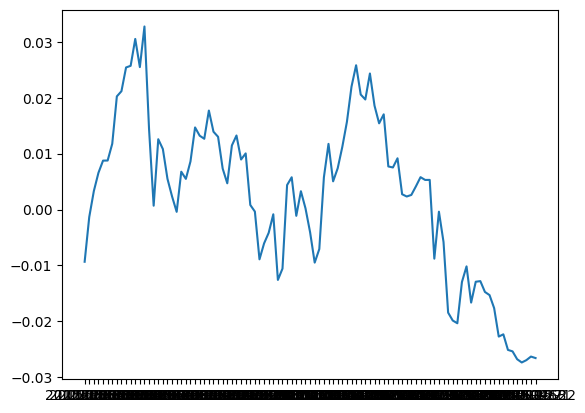

In [41]:
plt.plot(spread_df["KO_PEP"])

In [ ]:
def trade_portfolio(spread_df: pd.DataFrame, spread_df_normalized: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the trading period spread of the selected pairs from the formation period
    Also calculate the normalized spread using the portfolio parameters.

    Parameters: 
    spread_df: the trading period spread of the 20 pairs (6 months)
    spread_df_normalized: the trading period spread normalized of the 20 pairs (6 months)

    Returns: 
    DataFrame containing the returns (from period t to t+n) if a trade was entered and exited.
    """
    result_df = pd.DataFrame(index = stocks_trading.index)

    for pair, pair_norm in zip(spread_df.columns,spread_df_normalized.columns):
        pair_result = {}
        entered_trade = False
        spread_t_norm = 0
        rount_trip_count = 0
        print("proccesing pair: \n",  pair, "\n", 100*"-")
        
        for i in range(0,len(spread_df.index)):
            date = spread_df[pair].index[i]
            spread_current = spread_df[pair].iloc[i].item()
            spread_norm_current = spread_df_normalized[pair_norm].iloc[i].item()
            
            print(40*"-", "\nprocessing date", date)
            print("Current spread is: ",  spread_current, "and Current norm spread is",spread_norm_current)

            if abs(spread_norm_current) > 2 and not entered_trade:
                print("Trade was entered...")
                # when signal comes, save the variables at time t and enter trade
                entered_trade = True
                spread_t = spread_current
                spread_t_norm = spread_norm_current

            # if the spread at time t was > 2 and 
            # current spread returns to 0, exit and save delta_spread = spread_t+n - spread_t
            if spread_t_norm > 2 and spread_norm_current <= 0 and entered_trade:
                print("Trade was exited...")
                entered_trade = False   # exit trade
                delta_spread = abs(spread_current - spread_t) # return = delta spread
                rount_trip_count +=1 # trade count
            elif spread_t_norm < 2 and spread_norm_current >= 0 and entered_trade:
                print("Trade was exited...")
                entered_trade = False   # exit trade
                delta_spread = abs(spread_current - spread_t)
                rount_trip_count +=1
            else: 
                # if trade is not entered or spread of the entered trade did not return to 0
                delta_spread = 0.0 

            # Save the delta spread
            pair_result[date] = delta_spread
        
        # append to result df 
        result_df[pair] = pair_result
        print("\n number of completed rount trip trades: ", rount_trip_count, "\n",100*"-")

        
    return result_df

# Load and take subset of the dataframes
spread_df = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/calculate_portfolio_spread_test_result.csv", index_col = 0)
spread_df_normalized = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/calculate_portfolio_spread_norm_test_result.csv", index_col = 0)

result_df = trade_portfolio(spread_df,spread_df_normalized)
#result_df.to_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/trade_portfolio_result.csv")



proccesing pair: 
 KO_PEP 
 ----------------------------------------------------------------------------------------------------
---------------------------------------- 
processing date 2015-08-04
Current spread is:  -0.0093348061017075 and Current norm spread is -1.1624151937381273
---------------------------------------- 
processing date 2015-08-05
Current spread is:  -0.0013373160833733 and Current norm spread is -0.1690755023446924
---------------------------------------- 
processing date 2015-08-06
Current spread is:  0.003306429212788 and Current norm spread is 0.407707526933725
---------------------------------------- 
processing date 2015-08-07
Current spread is:  0.0065734679442139 and Current norm spread is 0.8134947473998096
---------------------------------------- 
processing date 2015-08-10
Current spread is:  0.0087488635510117 and Current norm spread is 1.0836928715314194
---------------------------------------- 
processing date 2015-08-11
Current spread is:  0.00876603

## Selecting formation and trading period from the whole timefrime
- main run function will be using this logic 

In [ ]:
import pandas as pd
import numpy as np

# Example stocks dataframe: 4 years of daily data
stocks = pd.DataFrame({
    'stock1': np.random.randn(4 * 365),
    'stock2': np.random.randn(4 * 365)
}, index=pd.date_range('2020-01-01', periods=4 * 365, freq='D'))

# Get unique months from the dataset
time_frame = stocks.index.unique()
months = pd.Series(time_frame).dt.to_period('M').unique()  # Extract unique months

# Iterate through months instead of days
for start_idx in range(len(months)):
    formation_start = months[start_idx].start_time
    formation_end = formation_start + pd.DateOffset(months=12)-pd.DateOffset(days=1)  # 12 months later
    trading_start = formation_start + pd.DateOffset(months=12)
    trading_end = formation_end + pd.DateOffset(months=6)  # Next 6 months

    # Ensure we don't exceed available data
    if trading_end > time_frame[-1]:
        break

    # Select training data (first 12 months)
    formation = stocks.loc[formation_start:formation_end]

    # Select testing data (next 6 months)
    trading = stocks.loc[trading_start:trading_end]

    # Print the actual index values instead of just start & end dates
    print(f"Formation Index Range:\n{formation.index}\n")
    print(f"Trading Index Range:\n{trading.index}\n")
    print("=" * 80)
